In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!unzip "/content/drive/MyDrive/VIT Sem VII/ML/ML Exp 9.zip" -d "/content/"

Archive:  /content/drive/MyDrive/VIT Sem VII/ML/ML Exp 9.zip
  inflating: /content/optdigits-orig.cv.Z  
  inflating: /content/optdigits-orig.names  
  inflating: /content/optdigits-orig.tra.Z  
  inflating: /content/optdigits-orig.wdep.Z  
  inflating: /content/optdigits-orig.windep.Z  
  inflating: /content/optdigits.names  
  inflating: /content/optdigits.tes  
  inflating: /content/optdigits.tra  
  inflating: /content/readme.txt     


In [4]:
with open('optdigits.tra', 'r') as f:
  lines = f.readlines()

data = []
labels = [f'f{i}' for i in range(1,65)]
labels.append('digit')
for line in lines:
  parts = line.strip().split(',')
  features = [int(x) for x in parts]
  data.append(features)

train_data = pd.DataFrame(data,columns = labels)
train_data

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f56,f57,f58,f59,f60,f61,f62,f63,f64,digit
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,0,0,5,13,11,2,0,0,0,2,...,0,0,0,8,13,15,10,1,0,9
3819,0,0,0,1,12,1,0,0,0,0,...,0,0,0,0,4,9,0,0,0,4
3820,0,0,3,15,0,0,0,0,0,0,...,0,0,0,4,14,16,9,0,0,6
3821,0,0,6,16,2,0,0,0,0,0,...,0,0,0,5,16,16,16,5,0,6


In [5]:
with open('optdigits.tes', 'r') as f:
  lines = f.readlines()

data = []
labels = [f'f{i}' for i in range(1,65)]
labels.append('digit')
for line in lines:
  parts = line.strip().split(',')
  features = [int(x) for x in parts]
  data.append(features)

test_data = pd.DataFrame(data, columns = labels)
test_data


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f56,f57,f58,f59,f60,f61,f62,f63,f64,digit
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1793,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1794,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1795,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_train_data = scaler.fit_transform(train_data.drop('digit', axis = 1))
std_test_data = scaler.transform(test_data.drop('digit', axis = 1))

In [11]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components = 2)
pca_train_data1 = pca1.fit_transform(std_train_data)
pca_test_data1 = pca1.transform(std_test_data)

In [12]:
pca2 = PCA(n_components = 3)
pca_train_data2 = pca2.fit_transform(std_train_data)
pca_test_data2 = pca2.transform(std_test_data)

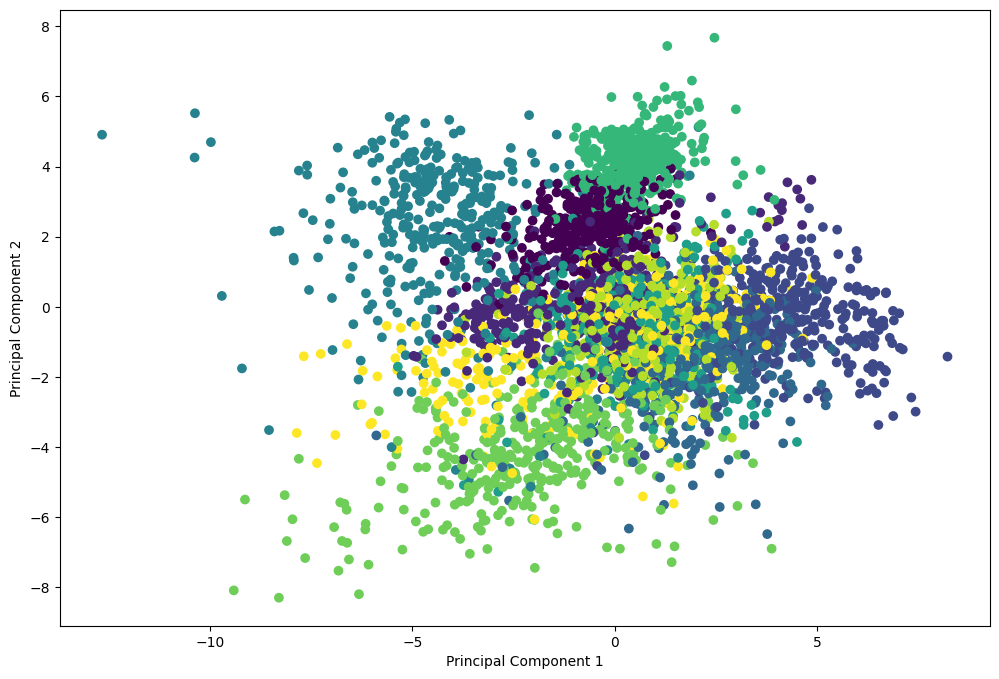

In [13]:
plt.figure(figsize=(12, 8))

plt.scatter(pca_train_data1[:, 0], pca_train_data1[:, 1], c=train_data['digit'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()